In [2]:
import numpy as np 
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
#import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:

x = './data/train/malignant'
y  = './data/train/benign'

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from glob import glob
from tensorflow.keras import backend as K
import gc

from tensorflow.keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm

In [5]:
SIZE=256
base_model = keras.applications.vgg19.VGG19(input_shape=(SIZE,SIZE,3),include_top=False,weights='imagenet')

In [6]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [7]:
base_model.trainable = False
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [8]:
from tensorflow.keras import regularizers

inputs = keras.Input(shape=(SIZE,SIZE,3))
x = keras.applications.vgg19.preprocess_input(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.003))(x)
x = layers.Dropout(0.35)(x)
x = layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.003))(x)
x = layers.Dropout(0.35)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

In [9]:
model = keras.Model(inputs, outputs)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
tf_op_layer_strided_slice (T [(None, 256, 256, 3)]     0         
_________________________________________________________________
tf_op_layer_BiasAdd (TensorF [(None, 256, 256, 3)]     0         
_________________________________________________________________
vgg19 (Functional)           (None, 8, 8, 512)         20024384  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)              

In [10]:
diretorio = './data/train/'

In [11]:
image_size = (SIZE, SIZE)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    diretorio,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    diretorio,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 2637 files belonging to 2 classes.
Using 2110 files for training.
Found 2637 files belonging to 2 classes.
Using 527 files for validation.


In [12]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [13]:
epochs = 30
history = model.fit(
    train_ds, epochs=epochs, validation_data=val_ds,
)

Epoch 1/30
66/66 [==============================] - 289s 4s/step - loss: 1.3188 - accuracy: 0.7318 - val_loss: 0.9993 - val_accuracy: 0.8368
Epoch 2/30
66/66 [==============================] - 249s 4s/step - loss: 0.9612 - accuracy: 0.8209 - val_loss: 0.8429 - val_accuracy: 0.8520
Epoch 3/30
66/66 [==============================] - 235s 4s/step - loss: 0.8193 - accuracy: 0.8336 - val_loss: 0.7378 - val_accuracy: 0.8520
Epoch 4/30
66/66 [==============================] - 232s 4s/step - loss: 0.7353 - accuracy: 0.8408 - val_loss: 0.6703 - val_accuracy: 0.8710
Epoch 5/30
66/66 [==============================] - 232s 4s/step - loss: 0.6417 - accuracy: 0.8588 - val_loss: 0.6106 - val_accuracy: 0.8786
Epoch 6/30
66/66 [==============================] - 232s 4s/step - loss: 0.6039 - accuracy: 0.8602 - val_loss: 0.5818 - val_accuracy: 0.8577
Epoch 7/30
66/66 [==============================] - 245s 4s/step - loss: 0.5412 - accuracy: 0.8711 - val_loss: 0.5452 - val_accuracy: 0.8653
Epoch 8/30
66

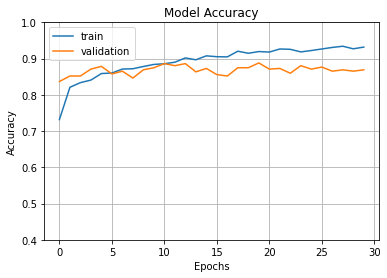

In [14]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

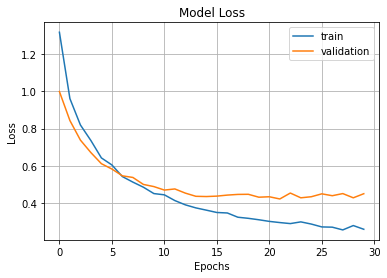

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [141]:
import cv2
#inp = r"/content/drive/MyDrive/code/data/test/melanoma/ISIC_0014766.jpg"
#inp = "../../code/data/train/melanoma/ISIC_0000029.jpg"
inp = r"./test/benign/1074.jpg"


image=cv2.imread(inp)
image_resized= cv2.resize(image, (256,256))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 256, 256, 3)


In [142]:
CATEGORIES = ["BENIGN","MALIGNANT"]
pred=model.predict(image)
print(pred)

[[0.09033343]]


In [143]:
def find_class(result):
    if result >= 0.5:
        return 1
    else:
        return 0

find_class(pred[0])

0

In [144]:
output_class=CATEGORIES[find_class(pred[0])]
print("The predicted class is", output_class)

The predicted class is BENIGN


TypeError: classification_report() missing 2 required positional arguments: 'y_true' and 'y_pred'

In [158]:
x_test=[]
test_path = "./test"

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

In [159]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [160]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 660 images belonging to 2 classes.
